# Import Required Libraries
Import the necessary libraries, including pandas, networkx, and matplotlib.

In [16]:
# Import Required Libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load Data
Load the IT-related data into a pandas DataFrame.

In [17]:
# Load Data
data = {
    'Source': ['Server', 'Server', 'Database', 'Database', 'Application', 'Application'],
    'Target': ['Database', 'Application', 'Server', 'Application', 'Server', 'Database'],
    'Type': ['Hosts', 'Runs', 'Connected to', 'Connected to', 'Depends on', 'Depends on']
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df

,Source,Target,Type
0,Server,Database,Hosts
1,Server,Application,Runs
2,Database,Server,Connected to
3,Database,Application,Connected to
4,Application,Server,Depends on
5,Application,Database,Depends on


# Create Knowledge Graph
Use NetworkX to create a knowledge graph from the loaded data.

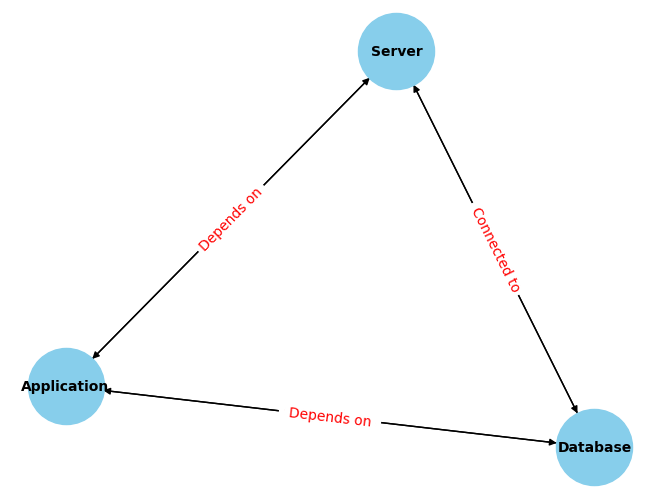

In [18]:
# Create Knowledge Graph

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph from the DataFrame
for index, row in df.iterrows():
    G.add_edge(row['Source'], row['Target'], type=row['Type'])

# Draw the graph
pos = nx.spring_layout(G)
edge_labels = nx.get_edge_attributes(G, 'type')
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Display the graph
plt.show()

# Visualize Knowledge Graph
Use matplotlib to visualize the knowledge graph.

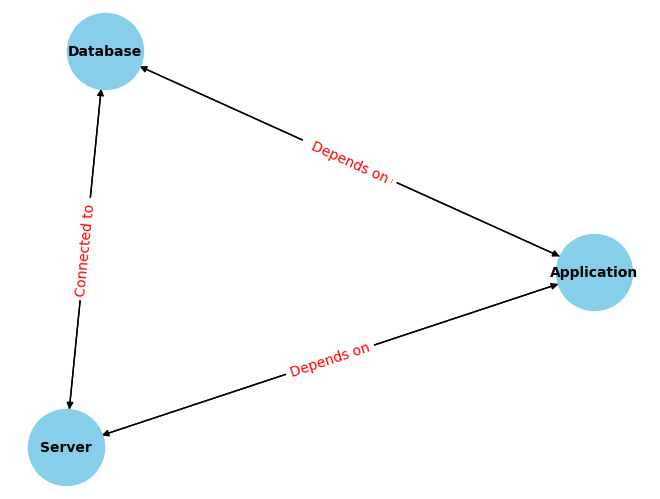

In [19]:
# Visualize Knowledge Graph

# Draw the graph
pos = nx.spring_layout(G)
edge_labels = nx.get_edge_attributes(G, 'type')
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Display the graph
plt.show()

# Query Knowledge Graph
Demonstrate how to query the knowledge graph to extract useful information.

In [20]:
# Query Knowledge Graph

# Function to query the knowledge graph
def query_knowledge_graph(graph, source_node):
    """
    Query the knowledge graph to find all nodes directly connected to the source node.
    
    Parameters:
    graph (networkx.DiGraph): The knowledge graph.
    source_node (str): The source node to query.
    
    Returns:
    list: A list of tuples containing the target node and the type of connection.
    """
    return [(target, graph[source_node][target]['type']) for target in graph.successors(source_node)]

# Example query
source_node = 'Server'
query_result = query_knowledge_graph(G, source_node)

# Display the query result
query_result

[('Database', 'Hosts'), ('Application', 'Runs')]

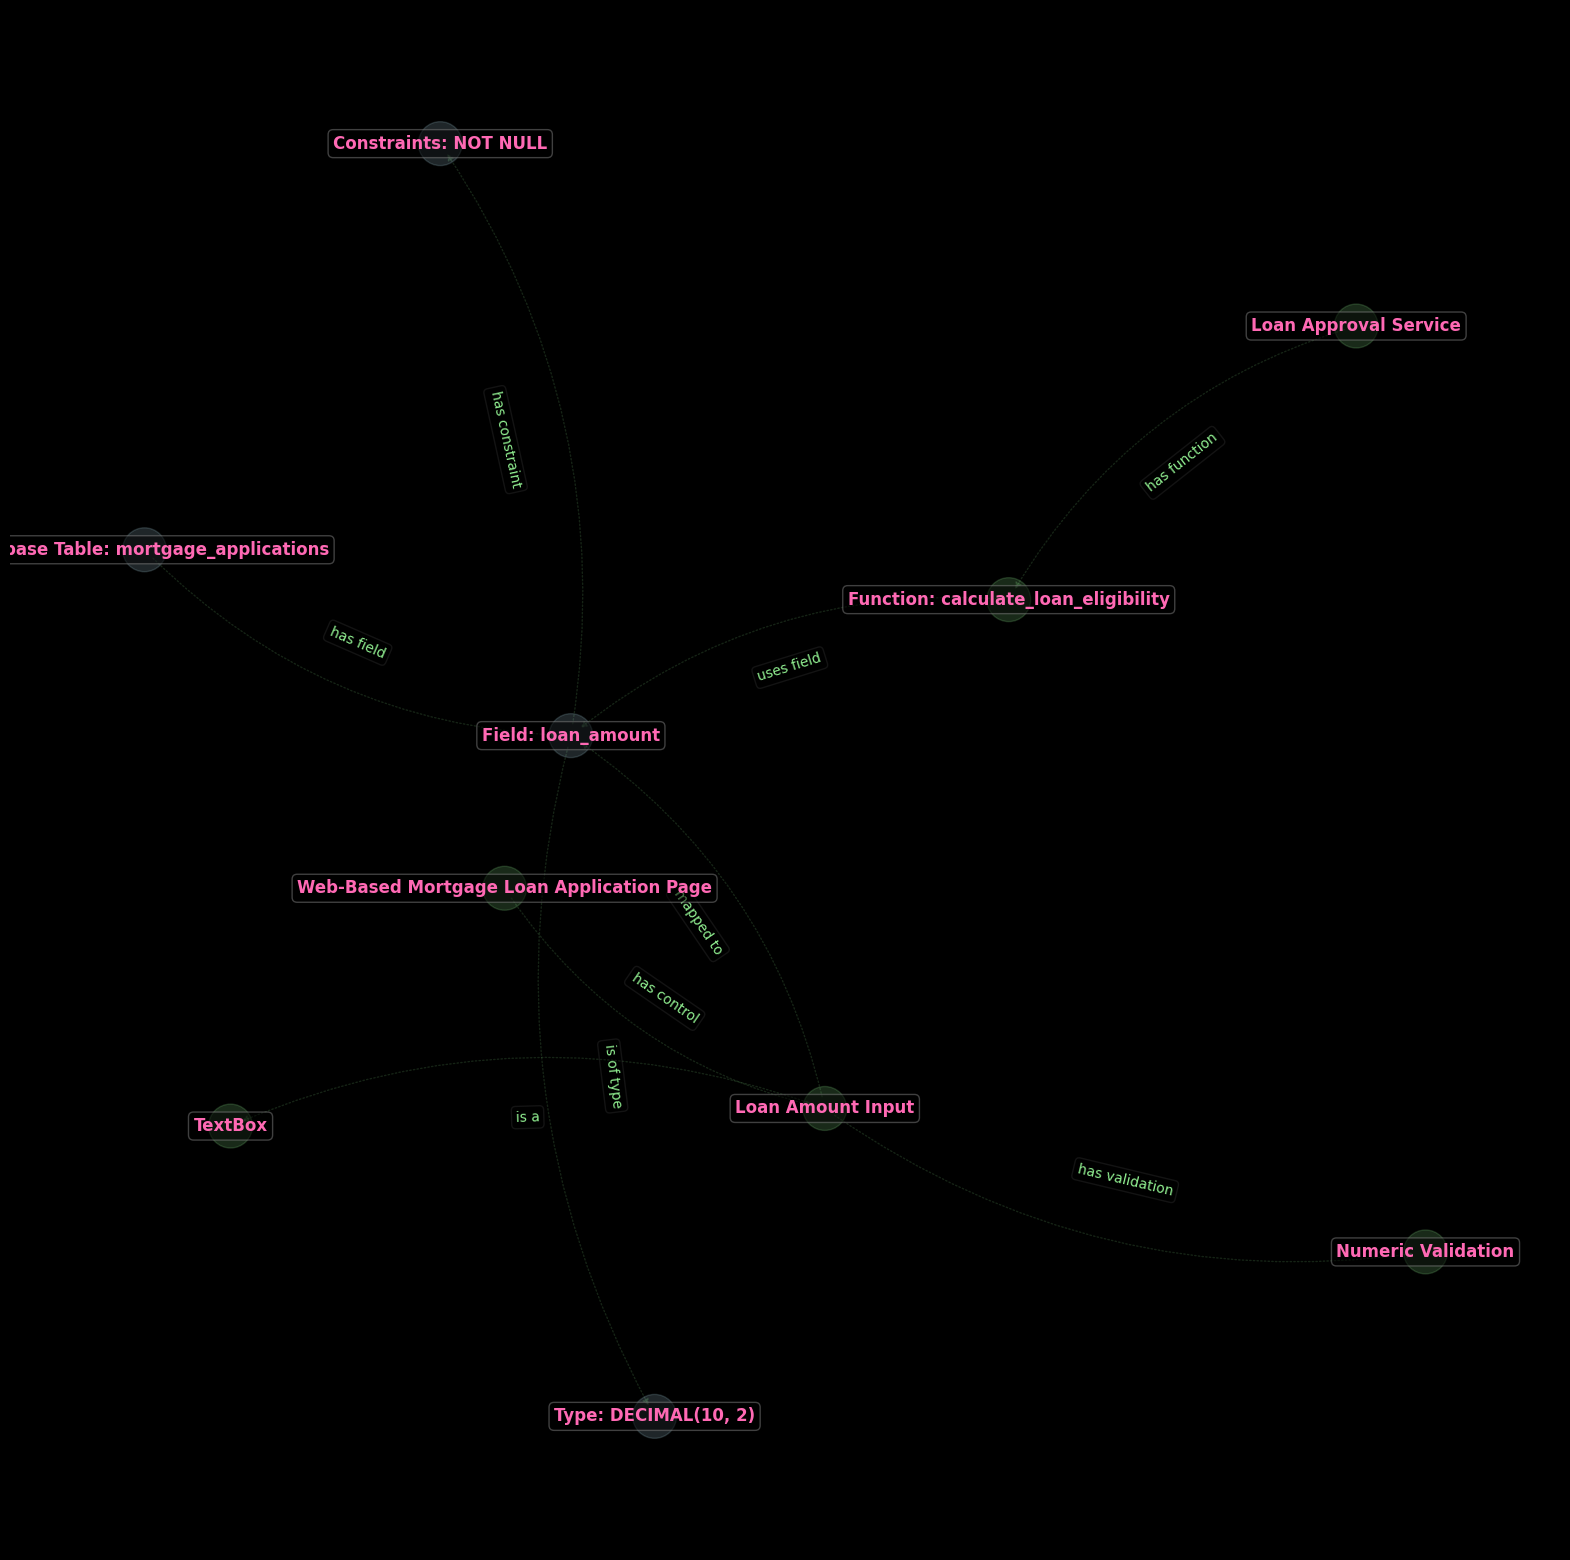

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_styled_graph(G):
    # Define colors and shapes for different categories
    color_map = {
        "page": "lightgreen",
        "control": "lightgreen",
        "type": "lightgreen",
        "validation": "lightgreen",
        "table": "lightblue",
        "field": "lightblue",
        "datatype": "lightblue",
        "constraint": "lightblue",
        "service": "lightgreen",
        "function": "lightgreen"
    }

    shape_map = {
        "page": "o",
        "control": "o",
        "type": "o",
        "validation": "o",
        "table": "o",
        "field": "o",
        "datatype": "o",
        "constraint": "o",
        "service": "o",
        "function": "o"
    }

    # Get node colors and shapes
    node_colors = [color_map[G.nodes[node]['category']] for node in G.nodes]
    node_shapes = [shape_map[G.nodes[node]['category']] for node in G.nodes]

    # Draw the graph with different shapes
    plt.figure(figsize=(20, 20), facecolor='black')  # Increase the figure size to 4x and set background to black
    ax = plt.gca()
    ax.set_facecolor('black')  # Set the background color of the plot area to black

    # Adjust the layout to make items closer
    pos = nx.spring_layout(G, seed=72, k=0.8) # Adjust the 'k' parameter to make nodes closer

    for shape in set(node_shapes):
        nx.draw_networkx_nodes(G, pos, node_shape=shape, node_color=[color_map[G.nodes[node]['category']] for node in G.nodes if shape_map[G.nodes[node]['category']] == shape]
                               , nodelist=[node for node in G.nodes if shape_map[G.nodes[node]['category']] == shape]
                               , node_size=1000, alpha=0.18)

    # Draw labels with a subtle gray outline
    nx.draw_networkx_labels(G, pos, font_size=12, font_color='hotpink', font_weight="semibold", bbox=dict(facecolor='black', alpha=0.5, edgecolor='gray', boxstyle='round,pad=0.3'))
    nx.draw_networkx_edges(G, pos, arrows=True, edge_color='lightgreen', alpha=0.15, connectionstyle='arc3,rad=0.2', style='dotted')
    edge_labels = nx.get_edge_attributes(G, 'type')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='lightgreen', bbox=dict(facecolor='black', alpha=0.15, edgecolor='gray', boxstyle='round,pad=0.3'), label_pos=0.5)

    # Display the graph
    plt.show()

# Create a directed graph
G = nx.DiGraph()

# Add nodes with categories
nodes = {
    "Web-Based Mortgage Loan Application Page": "page",
    "Loan Amount Input": "control",
    "TextBox": "type",
    "Numeric Validation": "validation",
    "Database Table: mortgage_applications": "table",
    "Field: loan_amount": "field",
    "Type: DECIMAL(10, 2)": "datatype",
    "Constraints: NOT NULL": "constraint",
    "Loan Approval Service": "service",
    "Function: calculate_loan_eligibility": "function"
}

# Add nodes to the graph
for node, category in nodes.items():
    G.add_node(node, category=category)

# Add edges
edges = [
    ("Web-Based Mortgage Loan Application Page", "Loan Amount Input", "has control"),
    ("Loan Amount Input", "TextBox", "is a"),
    ("Loan Amount Input", "Numeric Validation", "has validation"),
    ("Loan Amount Input", "Field: loan_amount", "mapped to"),
    ("Database Table: mortgage_applications", "Field: loan_amount", "has field"),
    ("Field: loan_amount", "Type: DECIMAL(10, 2)", "is of type"),
    ("Field: loan_amount", "Constraints: NOT NULL", "has constraint"),
    ("Loan Approval Service", "Function: calculate_loan_eligibility", "has function"),
    ("Function: calculate_loan_eligibility", "Field: loan_amount", "uses field")
]

# Add edges to the graph
for edge in edges:
    G.add_edge(edge[0], edge[1], type=edge[2])

# Draw the styled graph
draw_styled_graph(G)